In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df[df.duplicated()]

,Unnamed: 0,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,brand,drug_name,month,diagnosis_letter,diagnosis_number


In [4]:
df[['group','pcn']].isnull().sum()

group    3523637
pcn      3223225
dtype: int64

In [5]:
df[df['pcn'].isnull()]['group'].isnull().sum()

#isnull().sum()

37521

In [6]:
df['patient_pay'].describe()

count    1.256184e+07
mean     2.453093e+01
std      4.067418e+01
min      0.000000e+00
25%      8.510000e+00
50%      1.339000e+01
75%      1.901000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

In [7]:
df.isna().sum()

Unnamed: 0                0
tx_date                   0
pharmacy                  0
diagnosis                 0
drug                      0
bin                       0
pcn                 3223225
group               3523637
rejected                  0
patient_pay               0
brand                     0
drug_name                 0
month                     0
diagnosis_letter          0
diagnosis_number          0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,brand,drug_name,month,diagnosis_letter,diagnosis_number
0,0,2022-01-02,6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,G,99.93
1,1,2022-01-02,42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,U,60.52
2,2,2022-01-02,37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,Q,85.91
3,3,2022-01-02,30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,1,U,60.52
4,4,2022-01-02,18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,N,55.01


In [9]:
drug = df['drug_name'].unique()

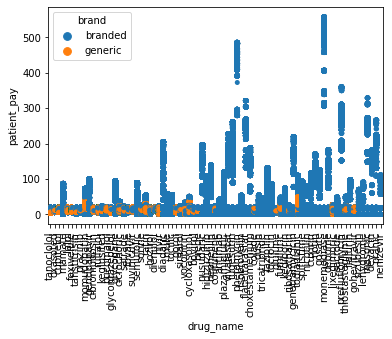

In [10]:
drugplot = sns.stripplot(data=df,
                x="drug_name",
                y="patient_pay",
                hue="brand")

drugplot.set_xticklabels(labels=drug, rotation=90) 
plt.show()

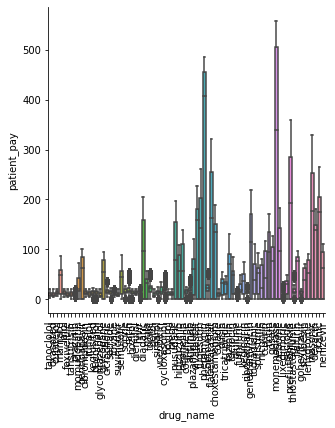

In [11]:
drugplot = sns.catplot(x="drug_name",
                y="patient_pay",
                data=df,
                kind="box")
plt.xticks(rotation=90)
plt.show()

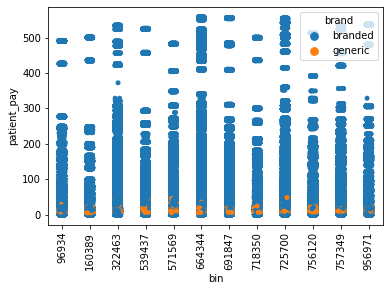

In [12]:
binplot = sns.stripplot(data=df,
                x="bin",
                y="patient_pay",
                hue="brand")

plt.xticks(rotation=90)
plt.show()

In [13]:
df['brand'].value_counts(normalize=True)

branded    0.630966
generic    0.369034
Name: brand, dtype: float64

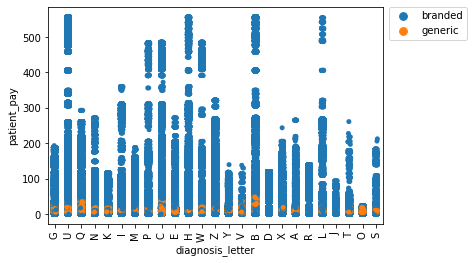

In [14]:
diagnosisplot = sns.stripplot(data=df,
                x="diagnosis_letter",
                y="patient_pay",
                hue="brand")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)
plt.show()

In [15]:
df['rejected'].value_counts(normalize=True)

False    0.916427
True     0.083573
Name: rejected, dtype: float64

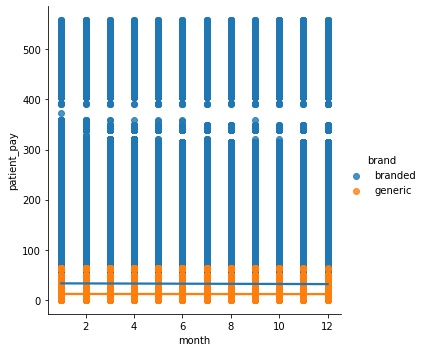

In [19]:
sns.lmplot(data=df,
x="month",
y="patient_pay",
hue="brand")

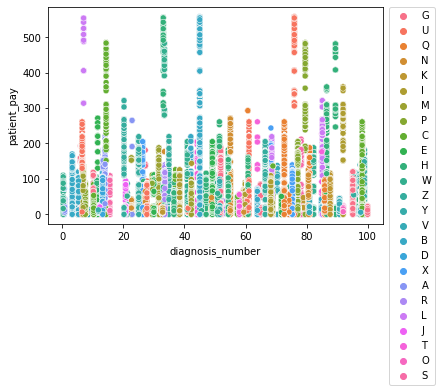

In [18]:
sns.scatterplot(x="diagnosis_number" , y="patient_pay" , data=df, hue="diagnosis_letter")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

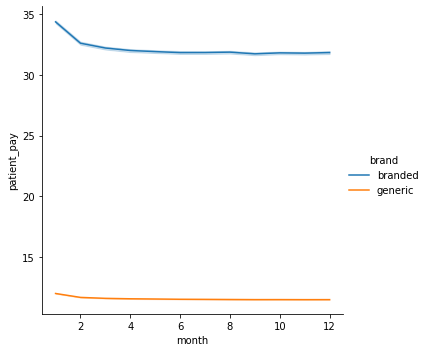

In [20]:
sns.relplot(x="month", y="patient_pay", data=df, kind="line", hue='brand')
plt.show()

In [17]:
df['pharmacy'].value_counts()

24    236368
52    233671
39    228171
5     225863
6     225361
10    225239
17    224402
28    224170
11    223963
44    223961
9     223215
29    222734
12    222711
16    221871
33    221768
4     221343
36    220908
1     220793
15    219946
48    219363
31    219344
19    218170
53    217930
54    217901
30    217742
27    217599
2     217192
0     217130
51    216956
43    216552
55    216081
8     215863
46    215650
40    215573
35    214755
37    214702
45    214694
42    214658
49    213797
3     213622
41    212514
57    212424
23    212024
26    211972
50    211777
18    211238
32    210954
20    210004
25    209345
14    209100
47    208349
56    207230
22    206438
34    205325
7     204332
38    204242
21    202537
13    200308
Name: pharmacy, dtype: int64

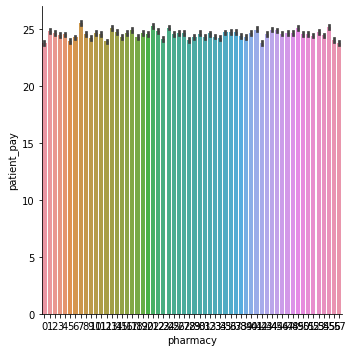

In [21]:
sns.catplot(x="pharmacy",
y="patient_pay",
data=df,
kind="bar")
plt.show()

In [22]:
df[df['rejected']==True]['patient_pay'].mean()

0.0

In [ ]:
#sns.swarmplot(data=df, x="drug_name", y="patient_pay", hue="diagnosis_letter")
#plt.xticks(rotation=90)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.show()

In [23]:
drug_rejected = df.groupby('rejected')['drug_name'].value_counts()

In [24]:
drug_rejected[True] 

drug_name
hidizuzunib        137976
mule               120452
diadaric            56816
nusudaric           52951
plazamiglutic       52790
                    ...  
nenizevir             351
thiostasteglume       350
colade                110
gohevitravir           94
lixegimoric            19
Name: drug_name, Length: 62, dtype: int64

In [25]:
drug_rejected[False] 

drug_name
prazinib        1148995
rulfalol         663544
pucomalol        508236
tanoclolol       475689
foxivelule       460254
                 ...   
dusin              7401
sizubesin          5799
gohevitravir       4015
lehydrome          1782
nenizevir           761
Name: drug_name, Length: 77, dtype: int64

In [26]:
diagnosis = df.groupby('diagnosis_letter')['diagnosis_number'].value_counts()

In [27]:
diagnosis['U']

diagnosis_number
60.52    494966
27.71    411729
61.13    207078
41.19     99239
6.52      62340
75.95     23817
97.42        40
7.99         32
Name: diagnosis_number, dtype: int64

In [28]:
df[df['diagnosis_letter'] =='U'].groupby('diagnosis_number')['drug_name'].value_counts()

diagnosis_number  drug_name  
6.52              ratin           36852
                  notin           13326
                  tugesutin       12162
7.99              keglusited         20
                  oxasoted           12
27.71             foxivelule      87392
                  tovane          78257
                  colifunene      75686
                  glulune         74900
                  sorine          71870
                  glycogane       23624
41.19             foxivelule      99239
60.52             oxasoted       155943
                  foxivelule     153728
                  keglusited     136342
                  mule            48953
61.13             prazinib        64236
                  ratin           47583
                  momudobatin     44965
                  hidizuzunib     18633
                  notin           16837
                  tugesutin       14824
75.95             monemodiase     23817
97.42             nicotilin          28
          

In [29]:
df[df['diagnosis_letter'] =='U'].groupby(['diagnosis_number','drug_name'])['patient_pay'].mean()

diagnosis_number  drug_name  
6.52              notin           74.857331
                  ratin           19.247222
                  tugesutin      107.654680
7.99              keglusited      16.342000
                  oxasoted         6.170000
27.71             colifunene      14.552133
                  foxivelule      10.137158
                  glulune         11.597082
                  glycogane       44.981293
                  sorine          15.057971
                  tovane          11.176974
41.19             foxivelule      10.193195
60.52             foxivelule      10.121673
                  keglusited      14.394333
                  mule            27.377105
                  oxasoted        10.000706
61.13             hidizuzunib     48.326477
                  momudobatin     28.283480
                  notin           73.529601
                  prazinib        11.727164
                  ratin           18.867310
                  tugesutin      108.783218
75

In [30]:
df[df['diagnosis_letter'] =='U'].groupby(['drug_name','diagnosis_number'])['patient_pay'].mean()

drug_name    diagnosis_number
colifunene   27.71                14.552133
foxivelule   27.71                10.137158
             41.19                10.193195
             60.52                10.121673
glulune      27.71                11.597082
glycogane    27.71                44.981293
hidizuzunib  61.13                48.326477
keglusited   7.99                 16.342000
             60.52                14.394333
momudobatin  61.13                28.283480
monemodiase  75.95               273.699245
mule         60.52                27.377105
nicotilin    97.42                56.917143
notin        6.52                 74.857331
             61.13                73.529601
oxasoted     7.99                  6.170000
             60.52                10.000706
prazinib     61.13                11.727164
ratin        6.52                 19.247222
             61.13                18.867310
             97.42                 8.145000
sorine       27.71                15.057971
to

In [31]:
df[df['rejected']==False].groupby(['drug_name'])['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
drug_name,,,,,,,,
antimab,258512.0,18.777124,7.520859,5.16,16.460,19.67,21.86,42.85
bovirol,195540.0,11.245044,3.866280,5.95,7.800,10.33,13.93,20.56
brede,113033.0,11.482343,3.692669,6.71,8.240,10.54,13.93,20.05
choxestamenium,74076.0,124.184396,49.907523,15.02,131.150,145.93,153.00,188.02
cibroniudosin,173112.0,13.127388,3.806480,5.59,10.770,12.74,17.11,19.82
...,...,...,...,...,...,...,...,...
tovane,304255.0,11.163631,3.015801,5.22,9.420,9.57,13.05,19.82
tricatripride,31165.0,30.794370,8.389765,7.76,27.220,31.97,36.78,47.48
tugesutin,70075.0,161.254110,70.039653,15.02,142.700,194.00,208.78,261.19


In [32]:
df[df['rejected']==False].groupby(['drug'])['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
drug,,,,,,,,
branded antimab,258512.0,18.777124,7.520859,5.16,16.46,19.67,21.86,42.85
branded bovirol,90259.0,13.301405,3.466154,5.95,12.22,12.74,15.55,20.56
branded brede,53055.0,14.189628,2.959215,6.71,12.38,13.39,17.11,20.05
branded choxestamenium,74076.0,124.184396,49.907523,15.02,131.15,145.93,153.00,188.02
branded cibroniudosin,84172.0,12.927689,3.705858,5.59,10.58,12.22,16.89,19.82
...,...,...,...,...,...,...,...,...
generic tanoclolol,255186.0,7.109552,3.266072,3.40,5.66,6.34,7.39,19.19
generic thiostasteglume,14127.0,13.658598,4.577080,5.16,11.97,14.12,15.86,25.01
generic todiadianic,16469.0,35.312099,14.011655,7.76,26.94,38.69,46.04,63.25


In [33]:
df.groupby('diagnosis')['drug_name'].value_counts()

diagnosis  drug_name      
A00.82     glulune              255
           antimab              137
A13.39     oxasoted            2158
           tovane              2036
           colifunene          1889
                              ...  
Z98.86     oxasoted           29673
           keglusited         24159
           thiostasteglume    20029
           spifistime          7439
           debome              5689
Name: drug_name, Length: 507, dtype: int64

In [ ]:
###  Try to calculate the price for the same drug with different bin. 
###  Need to get rid of those rejected

In [34]:
df[df['rejected']==False].groupby(['bin'])['patient_pay'].mean()

bin
96934     28.150094
160389    29.891843
322463    18.759562
539437    30.175992
571569    26.654383
664344    26.647256
691847    27.080463
718350    30.344841
725700    31.156868
756120    31.988048
757349    30.856515
956971    31.491312
Name: patient_pay, dtype: float64

In [35]:
bin_pay = df[df['rejected']==False].groupby(['bin', 'drug_name'])['patient_pay'].mean()

In [36]:
bin_pay[:,'antimab']

bin
96934     22.287885
160389    20.628408
322463    13.820387
539437    26.355029
571569    14.286249
664344    19.247499
691847    15.959371
718350    22.016836
725700    21.448033
756120    25.780665
757349    21.809664
956971    18.153154
Name: patient_pay, dtype: float64

In [37]:
bin = df['bin'].unique()
print(bin)

[725700 664344 571569  96934 539437 322463 757349 691847 160389 956971
 718350 756120]


In [38]:
drug_name = df['drug_name'].unique()
print(drug_name)

['tanoclolol' 'oxasoted' 'cupitelol' 'mamate' 'lalol' 'foxivelule'
 'tafistitrisin' 'prazinib' 'momudobatin' 'gentipapavir' 'cibroniudosin'
 'rulfalol' 'keglusited' 'pucomalol' 'glycontazepelol' 'glycogane'
 'cicrochoric' 'satrade' 'tovane' 'suvinicuvir' 'semufolic' 'sorine'
 'ratin' 'hozirol' 'dienulol' 'hivir' 'diadaric' 'mule' 'tocilic' 'gorol'
 'simarol' 'vocopirin' 'cycloxasonol' 'bovirol' 'brede' 'nusudaric'
 'hidizuzunib' 'nephelilin' 'colifunene' 'antimab' 'plazamiglutic'
 'vivafastat' 'tugesutin' 'pheromycin' 'isobrovelin' 'flacelfatastat'
 'choxestamenium' 'colade' 'dusin' 'tricatripride' 'fazipilin' 'tocrocin'
 'glulune' 'fumiluric' 'kediborin' 'ribosatharin' 'genetramycicin'
 'todiadianic' 'spifistime' 'nicotilin' 'cuxirin' 'notin' 'gosate'
 'monemodiase' 'debome' 'lixegimoric' 'sacrode' 'prefluflomycin'
 'thiostasteglume' 'flalurin' 'gohevitravir' 'sizubesin' 'lehydrome'
 'masonic' 'devacin' 'pranic' 'nenizevir']


In [39]:
bin_dict ={}
for drug in drug_name:
    bin_dict[drug] = {}
    for b in bin:
        if drug in bin_pay[b,:]:
            bin_dict[drug][str(b)] = bin_pay[b,drug]
        else:
            bin_dict[drug][str(b)] = None

In [40]:
bin_df = pd.DataFrame.from_dict(bin_dict)

In [41]:
bin_df

,tanoclolol,oxasoted,cupitelol,mamate,lalol,foxivelule,tafistitrisin,prazinib,momudobatin,gentipapavir,...,prefluflomycin,thiostasteglume,flalurin,gohevitravir,sizubesin,lehydrome,masonic,devacin,pranic,nenizevir
725700,9.430616,9.566277,12.573548,60.503886,12.581998,9.633919,9.474094,11.497591,41.733305,84.881214,...,286.196570,18.525547,83.657595,12.991694,63.304266,83.054625,258.631688,148.190585,216.935383,96.995732
664344,10.876325,10.145525,14.418850,48.628294,13.454202,10.542445,10.169446,12.458290,35.650376,71.895811,...,233.644993,17.498810,71.286714,15.065597,54.496267,70.182042,208.353975,124.505930,169.651030,70.902903
571569,8.339670,8.391312,11.188427,62.178699,8.466421,8.771408,8.784920,8.690487,48.637806,61.490779,...,303.460052,15.501420,87.459273,12.131915,36.073806,83.082195,270.060365,154.681527,177.649156,99.248056
96934,9.047070,9.539291,13.217934,45.385082,12.903973,9.563696,9.699517,11.973902,34.995788,75.019310,...,244.170024,18.977835,67.860873,12.502837,40.798354,75.431875,226.895009,129.497816,173.813239,90.374167
539437,11.121930,11.327650,15.470000,63.985794,11.141959,11.127365,11.129864,11.424601,40.391883,89.198913,...,293.084251,18.144315,86.702665,15.470000,66.329164,42.880781,258.752456,150.150449,131.527618,97.402174
322463,7.823184,8.329758,10.611370,23.181281,9.951386,8.646214,9.546910,11.596389,22.592412,44.578673,...,106.877298,10.897415,47.550933,11.271692,39.555277,36.414118,89.360395,74.368266,101.907029,61.972466
757349,12.745650,12.496246,16.342212,50.856529,16.368008,12.668048,12.910444,13.167169,36.370670,82.119072,...,247.485952,18.788418,83.095638,16.812766,50.992275,69.284455,245.158289,144.949694,203.383932,93.227115
691847,10.456818,10.962972,14.892457,42.989626,14.691579,10.955326,13.644542,12.331799,27.306101,59.921805,...,255.303502,19.312374,75.352421,16.102636,35.695364,60.616000,176.209262,121.882055,176.206549,58.305506
160389,8.595318,9.106088,12.540000,53.209796,12.540000,9.157241,9.043986,11.433165,38.471303,81.043165,...,247.321213,19.247895,78.467384,14.034865,57.334412,73.191034,232.854532,131.976111,199.988737,80.235000
956971,13.462372,13.795793,17.190000,53.273275,17.190000,13.467058,11.617372,7.506514,37.068304,88.617848,...,306.129810,15.965353,86.949876,16.784231,63.747529,80.886889,270.203918,153.524964,210.315129,97.440000
